In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing values:
training data: drop them, or group them as another class 

test data: use mode, or group it as another class 


Categorical:
edu + edu-num = edu: label as 1,2,3,... (less groups)
married_status:merge (less groups)
race: merge (less groups)
workclass: merge (less groups)
countries: US & non-US, merge (less groups)

Numerical:
captial: merge (less groups)/log/-max,min
fnlwght: log


standardlize: x-mean/sd

fell outliers: 
get rid of those out of +- 3.5 * std
get rid of those out of +- 5 * iqr

In [2]:
df = pd.read_csv("/Users/xin/Downloads/AMS 580 Project/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education-num   26049 non-null  int64 
 5   marital-status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital-gain    26049 non-null  int64 
 11  capital-loss    26049 non-null  int64 
 12  hours-per-week  26049 non-null  int64 
 13  native-country  26049 non-null  object
 14  income          26049 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.0+ MB


In [3]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
5,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
6,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
7,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
8,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
9,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [4]:
cols = df.columns.tolist()
print(cols)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [5]:
# Get columns with dtype 'object'
object_cols = df.dtypes[df.dtypes == 'object'].index

for col in object_cols:
    df[col] = df[col].str.strip()

In [6]:
df[df == " ?"] = np.nan
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# Age

### Display the distribution of raw data of age from train data.

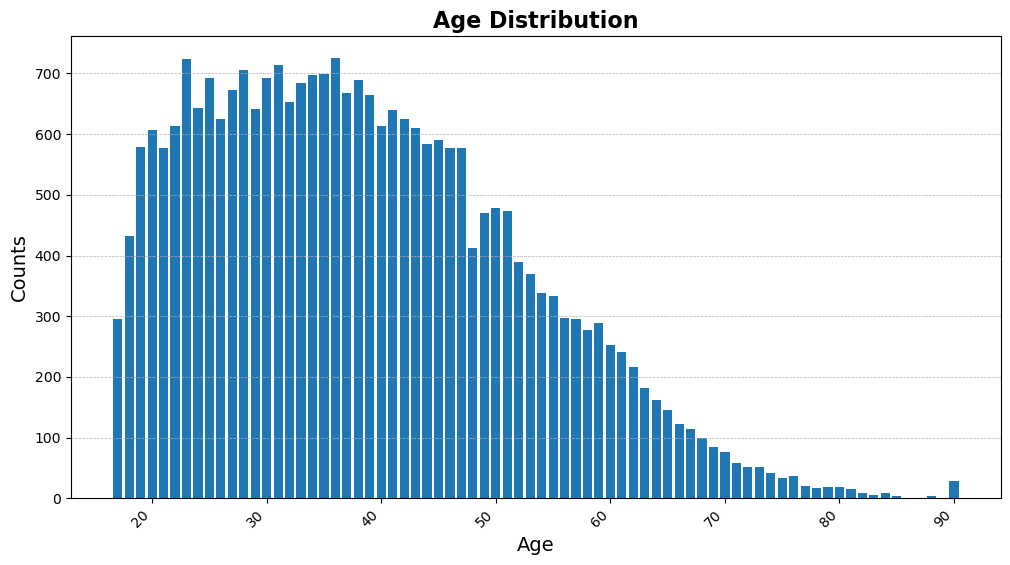

In [7]:
fig1 = plt.figure(figsize = (12,6))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_age = df["age"].value_counts()
plt.bar(vc_age.index, vc_age.values)
plt.title("Age Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/age1.png", bbox_inches="tight")

### Merge "age" as age groups

In [8]:
df["age"].min()

17

In [9]:
df["age"].max()

90

In [10]:
def age_group(x):
    if( 16 < x < 31 ):
        return "17-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

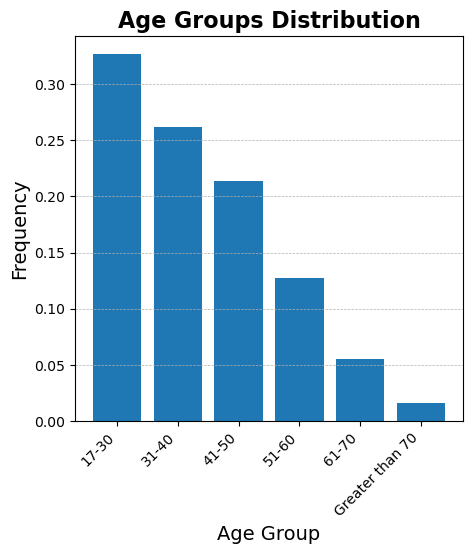

In [11]:
Fig1 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_age_group = df["age_group"].value_counts()
plt.bar(vc_age_group.index, vc_age_group.values/df.shape[0])
plt.title("Age Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/age2.png", bbox_inches="tight")

### Number of people in each age group.

In [12]:
print(vc_age_group)

17-30              8499
31-40              6808
41-50              5564
51-60              3316
61-70              1443
Greater than 70     419
Name: age_group, dtype: int64


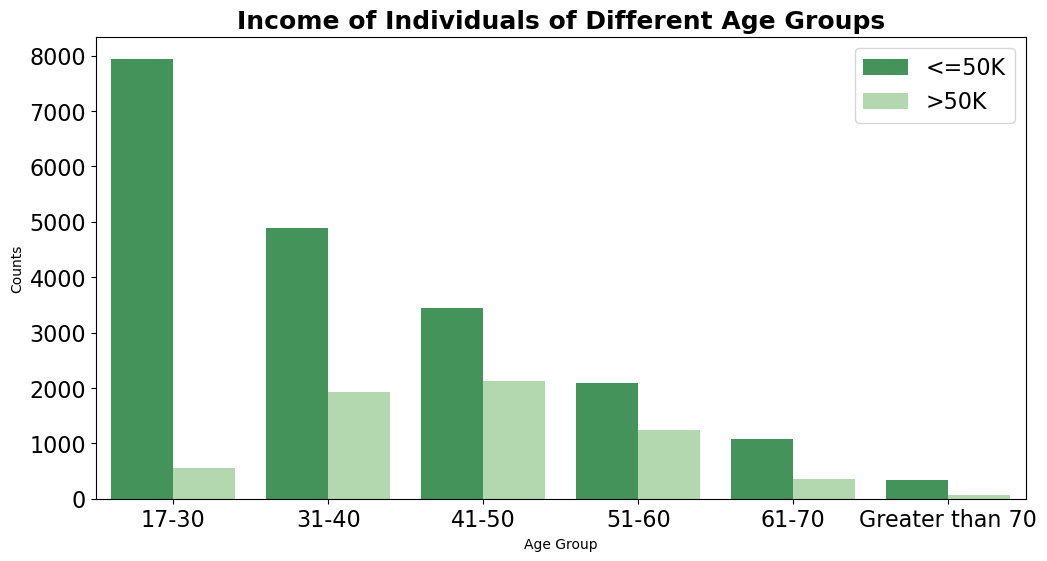

In [13]:
Fig2 = plt.figure(figsize=(12,6))
order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
# sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
sns.countplot(data=df, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [14]:
# Grouping data by workclass group and income
grouped = df.groupby(['age_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
age_group,,
17-30,7943,556
31-40,4889,1919
41-50,3437,2127
51-60,2084,1232
61-70,1078,365
Greater than 70,345,74


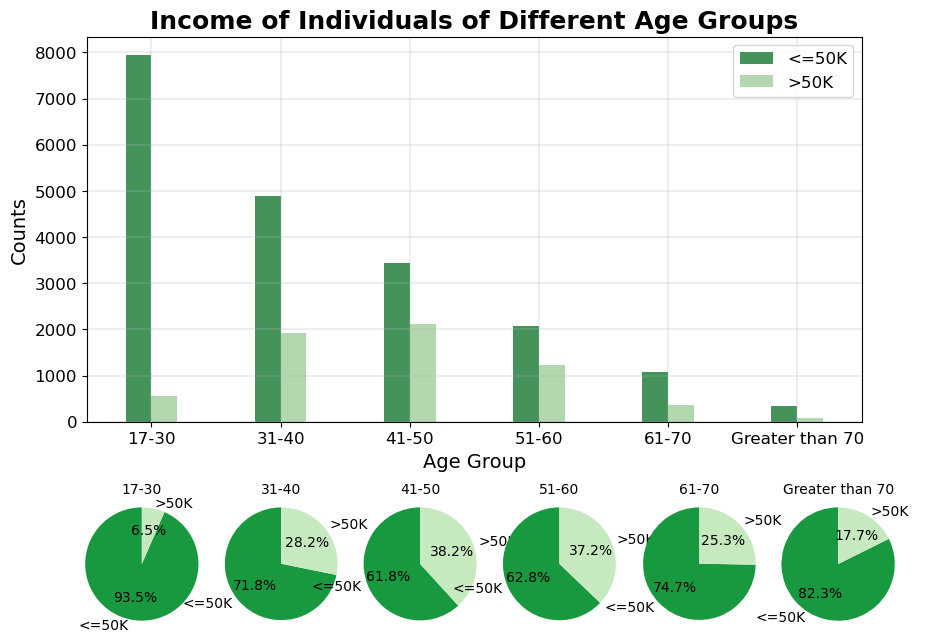

In [15]:
FIG2 =plt.figure(figsize=(10,5))
order_list = ['17-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
ax = sns.countplot(data=df, x='age_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)
        
        # Get the maximum bar height for the current group
#         max_height = max(bar1.get_height(), bar2.get_height())

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars
#         print(bar1.get_x(), bar2.get_x(), bar1.get_width(), x_pos)
#         y_pos = max_height + 1000  # Offset above the tallest bar

        # Pie chart inset above the bar
        pie_ax = FIG2.add_axes([x_pos / (len(order_list)+1.18) + 0.1, -0.3, 0.16, 0.25])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#18993f', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/age3.png", bbox_inches="tight")
plt.show()

### The height of each segment of the bar indicates the number of individuals with that specific income level within the age group.

# Workclass

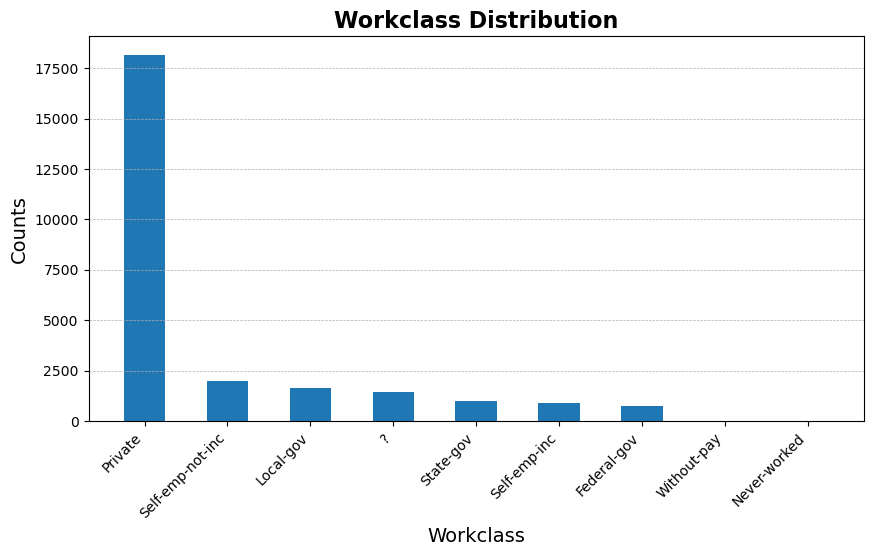

In [16]:
fig2 = plt.figure(figsize = (10,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_workclass = df["workclass"].value_counts()
plt.bar(vc_workclass.index, vc_workclass.values, width = 0.5)
plt.title("Workclass Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Workclass", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/workclass1.png", bbox_inches="tight")

### Merge "workclass" as workclass group to have less group.

There're eight categories of "workclass" but only "Private" has a significant number of count so that we merge all categories except "Private" as a "Non- private" group.

In [17]:
df['workclass'].describe()

count       26049
unique          9
top       Private
freq        18166
Name: workclass, dtype: object

In [18]:
def workclass_group_cfg(x):
    if( x == "Private" ):
        return "Private"
    if( x == "Self-emp-not-inc"):
        return "Self-emp-not-inc"
    if( x == "Self-emp-inc"):
        return "Self-emp-inc"
    if( x == "Federal-gov"):
        return "Federal-gov"
    if( x == "Local-gov"):
        return "Local-gov"
    if( x == "State-gov"):
        return "State-gov"
    if x in ["Without-pay", "Never-worked"]:
        return "No_income"
    else:
        return "Other"

df['workclass_group_cfg'] = df['workclass'].apply(workclass_group_cfg)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

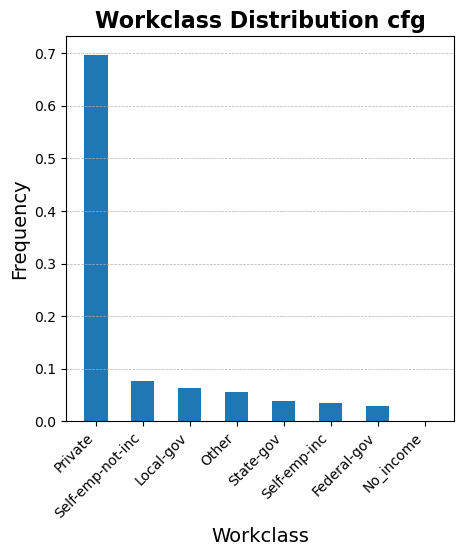

In [19]:
Fig3 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
#colors = ['blue', 'green', 'orange']
vc_workclass_group_cfg = df["workclass_group_cfg"].value_counts()
plt.bar(vc_workclass_group_cfg.index, vc_workclass_group_cfg.values/df.shape[0], width = 0.5)
plt.title("Workclass Distribution cfg", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Workclass", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
# plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/workclass2.png", bbox_inches="tight")

In [20]:
print(vc_workclass_group_cfg)

Private             18166
Self-emp-not-inc     2011
Local-gov            1674
Other                1471
State-gov            1020
Self-emp-inc          915
Federal-gov           774
No_income              18
Name: workclass_group_cfg, dtype: int64


In [21]:
def workclass_group(x):
    if( x == "Private" ):
        #print(x)
        return "Private"
    if x in ["Self-emp-not-inc", "Self-emp-inc"]:
        #print(x)
        return "Self-employed"
    if x in ["Federal-gov" or "Local-gov" or "State-gov"]:
        #print(x)
        return "Government Job"
    else:
        #print(x)
        # x == "Without-pay" or "Never-worked" or "?"
        return "Other"

df['workclass_group'] = df['workclass'].apply(workclass_group)
df['workclass_group'].describe()

count       26049
unique          4
top       Private
freq        18166
Name: workclass_group, dtype: object

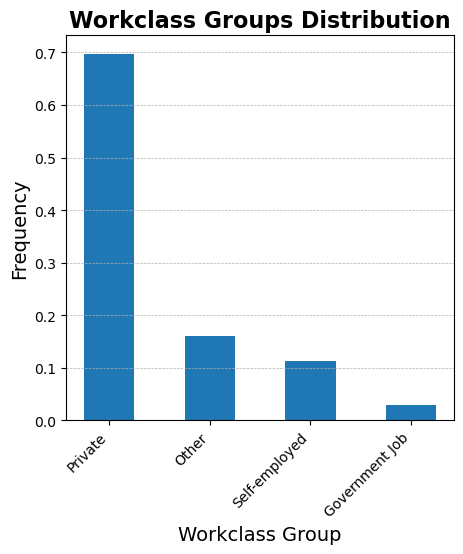

In [22]:
Fig4 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
colors = ['blue', 'green', 'orange','red']
vc_workclass_group = df["workclass_group"].value_counts()
plt.bar(vc_workclass_group.index, vc_workclass_group.values/df.shape[0], width = 0.5)#, color=colors)
plt.title("Workclass Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Workclass Group", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/workclass2.png", bbox_inches="tight")

In [23]:
vc_workclass_group.index

Index(['Private', 'Other', 'Self-employed', 'Government Job'], dtype='object')

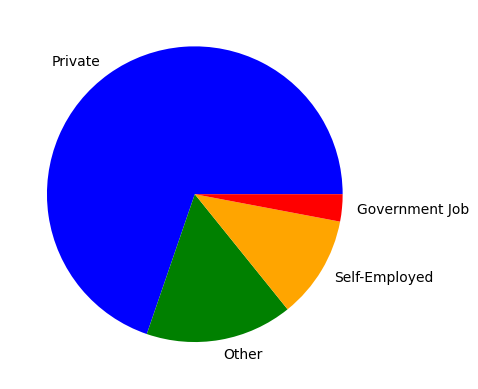

In [24]:
labels = ["Private", "Other", "Self-Employed", 'Government Job']

plt.pie(vc_workclass_group, labels = labels, colors = colors)
plt.show() 

In [25]:
# Grouping data by workclass group and income
grouped = df.groupby(['workclass_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
workclass_group,,
Government Job,466,308
Other,3282,901
Private,14184,3982
Self-employed,1844,1082


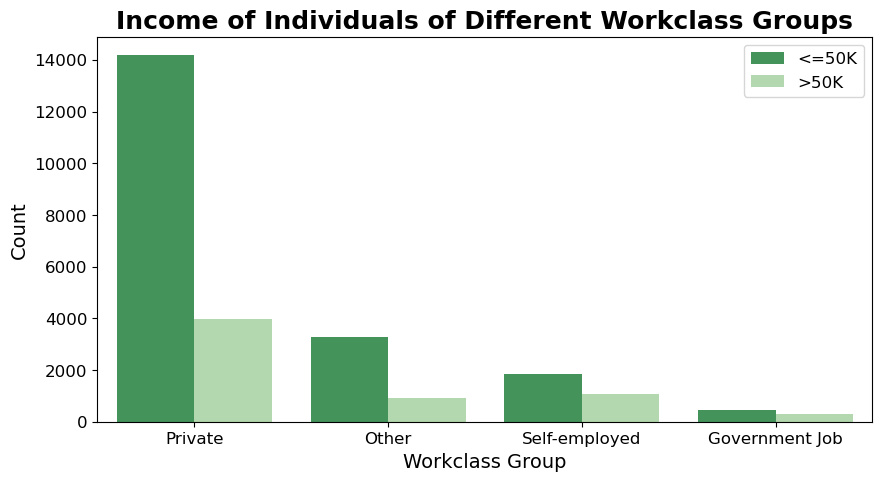

In [26]:
Fig5 =plt.figure(figsize=(10,5))
order_list = ['Private', 'Other', 'Self-employed', 'Government Job']
sns.countplot(data=df, x='workclass_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Workclass Groups', fontsize=18, fontweight='bold')
plt.xlabel('Workclass Group', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

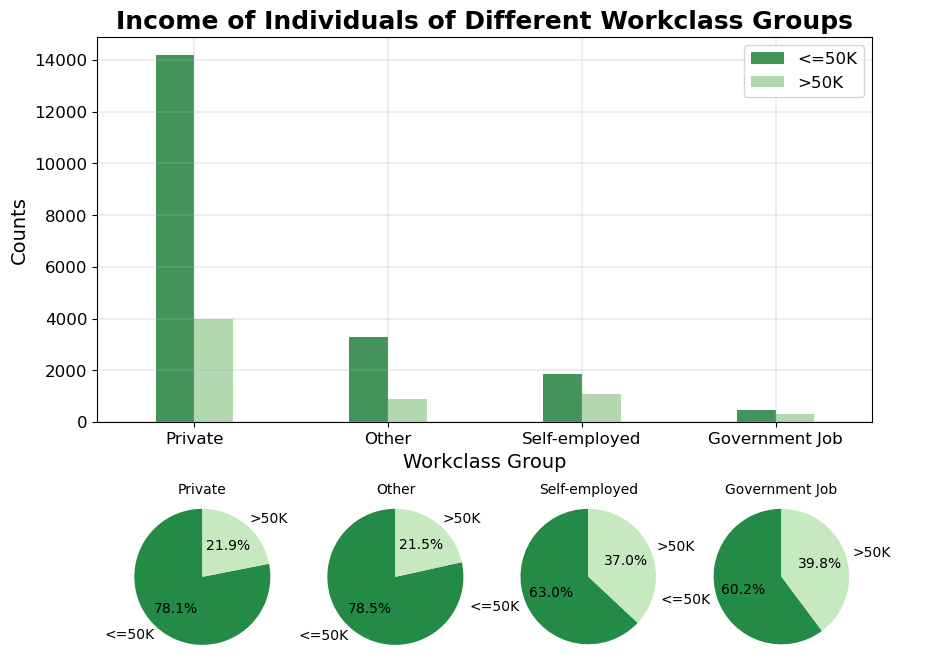

In [27]:
FIG5 =plt.figure(figsize=(10,5))
order_list = ['Private', 'Other', 'Self-employed', 'Government Job']
ax = sns.countplot(data=df, x='workclass_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Workclass Groups', fontsize=18, fontweight='bold')
plt.xlabel('Workclass Group', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)


        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars

        # Pie chart inset above the bar
        pie_ax = FIG5.add_axes([x_pos / (len(order_list)+1.18) + 0.08, -0.35, 0.3, 0.3])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/workclass3.png", bbox_inches="tight")
plt.show()

## fnlwgt

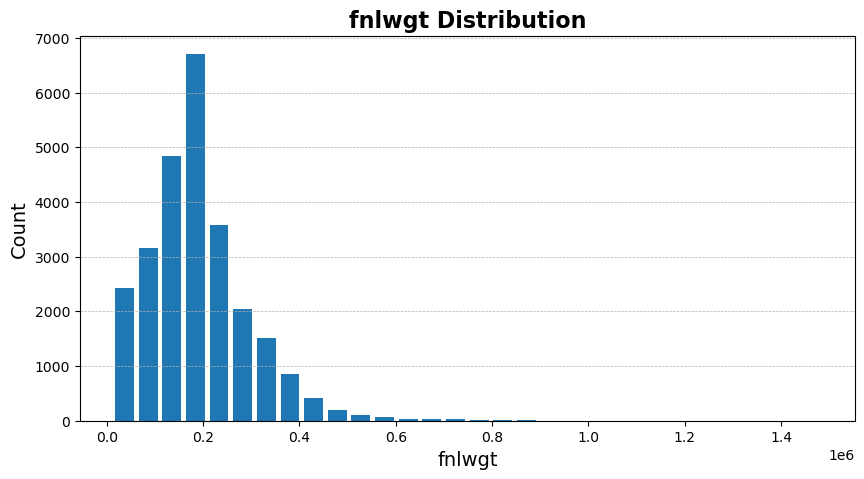

In [28]:
fig3 = plt.figure(figsize = (10,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(df["fnlwgt"], bins=30, rwidth=0.8)
plt.title("fnlwgt Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("fnlwgt", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/fnlwgt1.png", bbox_inches="tight")

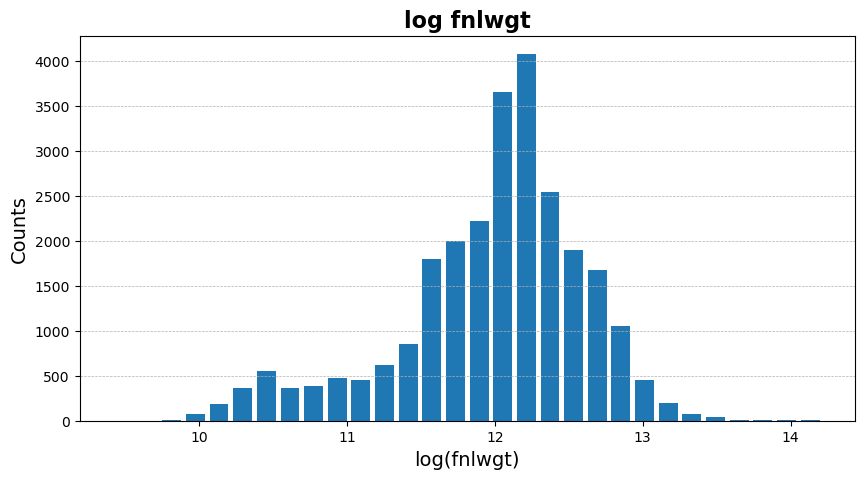

In [29]:
Fig6 = plt.figure(figsize = (10,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(np.log(df["fnlwgt"]), bins=30, rwidth=0.8)
plt.title("log fnlwgt", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("log(fnlwgt)", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/log_fnlwgt.png", bbox_inches="tight")

## Education

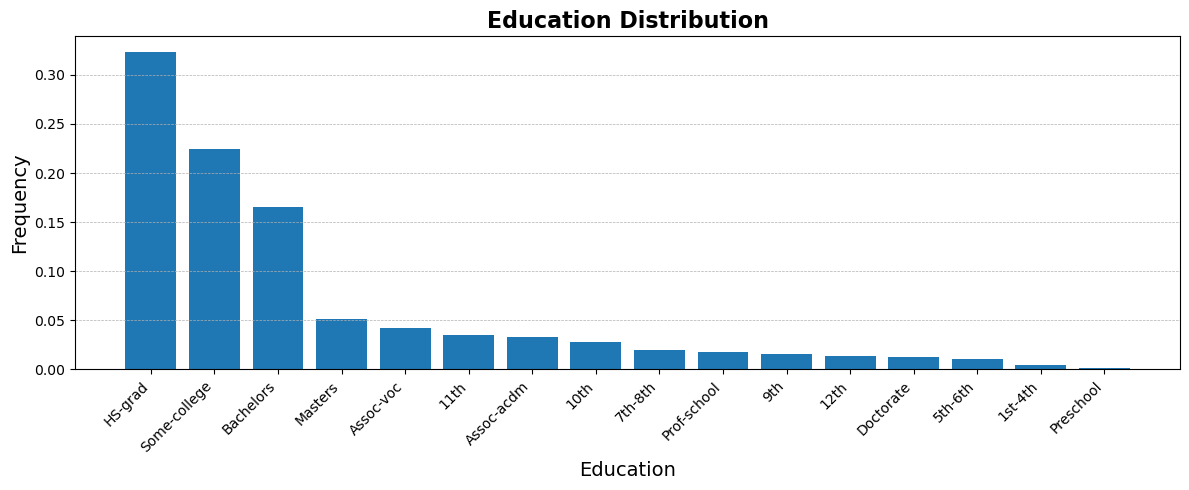

In [30]:
fig4 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_education = df["education"].value_counts()
plt.bar(vc_education.index, vc_education.values/df.shape[0])
plt.title("Education Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Education", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/education1.png", bbox_inches="tight")

In [31]:
def education_group(x):
    if x in [ "Preschool", "1st-4th", "5th-6th", "7th-8th"]:
        return "before_high_school"
    if x in ["9th", "10th", "11th", "12th"]:
        return "high_school"
    if(x == "HS-grad"):
        return "HS-grad"
    if(x == "Prof-school"):
        return "Prof_school"
    if(x == "Assoc-acdm"):
        return "Assoc-acdm"
    if(x == "Assoc-voc"):
        return "Assoc-voc"
    if(x == "Some-college"):
        return "Some-college"
    if(x == "Bachelors"):
        return "Bachelors"
    if(x == "Masters"):
        return "Masters"
    else: # "Doctorate"
        return "Doctorate"

df['education_group'] = df['education'].apply(education_group)
df['education_group'].describe()

count       26049
unique         10
top       HS-grad
freq         8415
Name: education_group, dtype: object

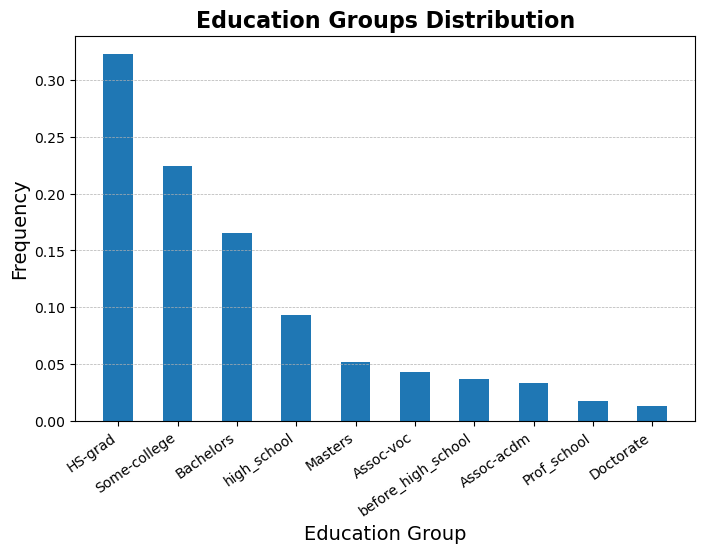

In [32]:
Fig6 = plt.figure(figsize = (8,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_education_group = df["education_group"].value_counts()
plt.bar(vc_education_group.index, vc_education_group.values/df.shape[0], width = 0.5)
plt.title("Education Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Education Group", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=35, ha='right')
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/education2.png", bbox_inches="tight")

In [33]:
print(vc_education_group.index)

Index(['HS-grad', 'Some-college', 'Bachelors', 'high_school', 'Masters',
       'Assoc-voc', 'before_high_school', 'Assoc-acdm', 'Prof_school',
       'Doctorate'],
      dtype='object')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, 'Bachelors'),
  Text(3, 0, 'high_school'),
  Text(4, 0, 'Masters'),
  Text(5, 0, 'Assoc-voc'),
  Text(6, 0, 'before_high_school'),
  Text(7, 0, 'Assoc-acdm'),
  Text(8, 0, 'Prof_school'),
  Text(9, 0, 'Doctorate')])

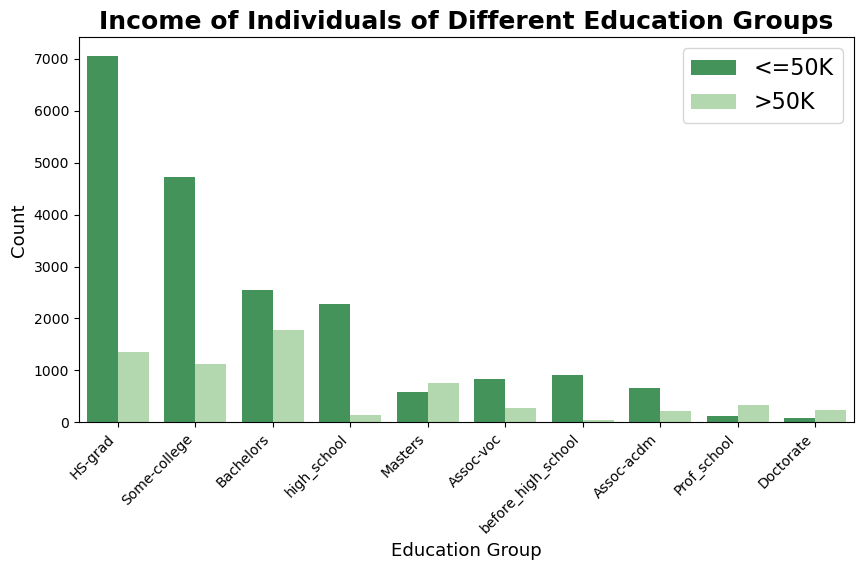

In [34]:
Fig7 =plt.figure(figsize=(10,5))
order_list = ['HS-grad', 'Some-college', 'Bachelors', 'high_school', 'Masters',
       'Assoc-voc', 'before_high_school', 'Assoc-acdm', 'Prof_school',
       'Doctorate']
# sns.countplot(df['age_group'], hue = df['income'], palette='Greens_r', order = order_list)
sns.countplot(data=df, x='education_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Education Groups', fontsize=18, fontweight='bold')
plt.xlabel('Education Group', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=16)
plt.xticks(rotation=45, ha='right')

In [35]:
# Grouping data by workclass group and income
grouped = df.groupby(['education_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
education_group,,
Assoc-acdm,654,216
Assoc-voc,836,268
Bachelors,2539,1774
Doctorate,78,245
HS-grad,7062,1353
Masters,587,761
Prof_school,121,339
Some-college,4721,1126
before_high_school,905,49


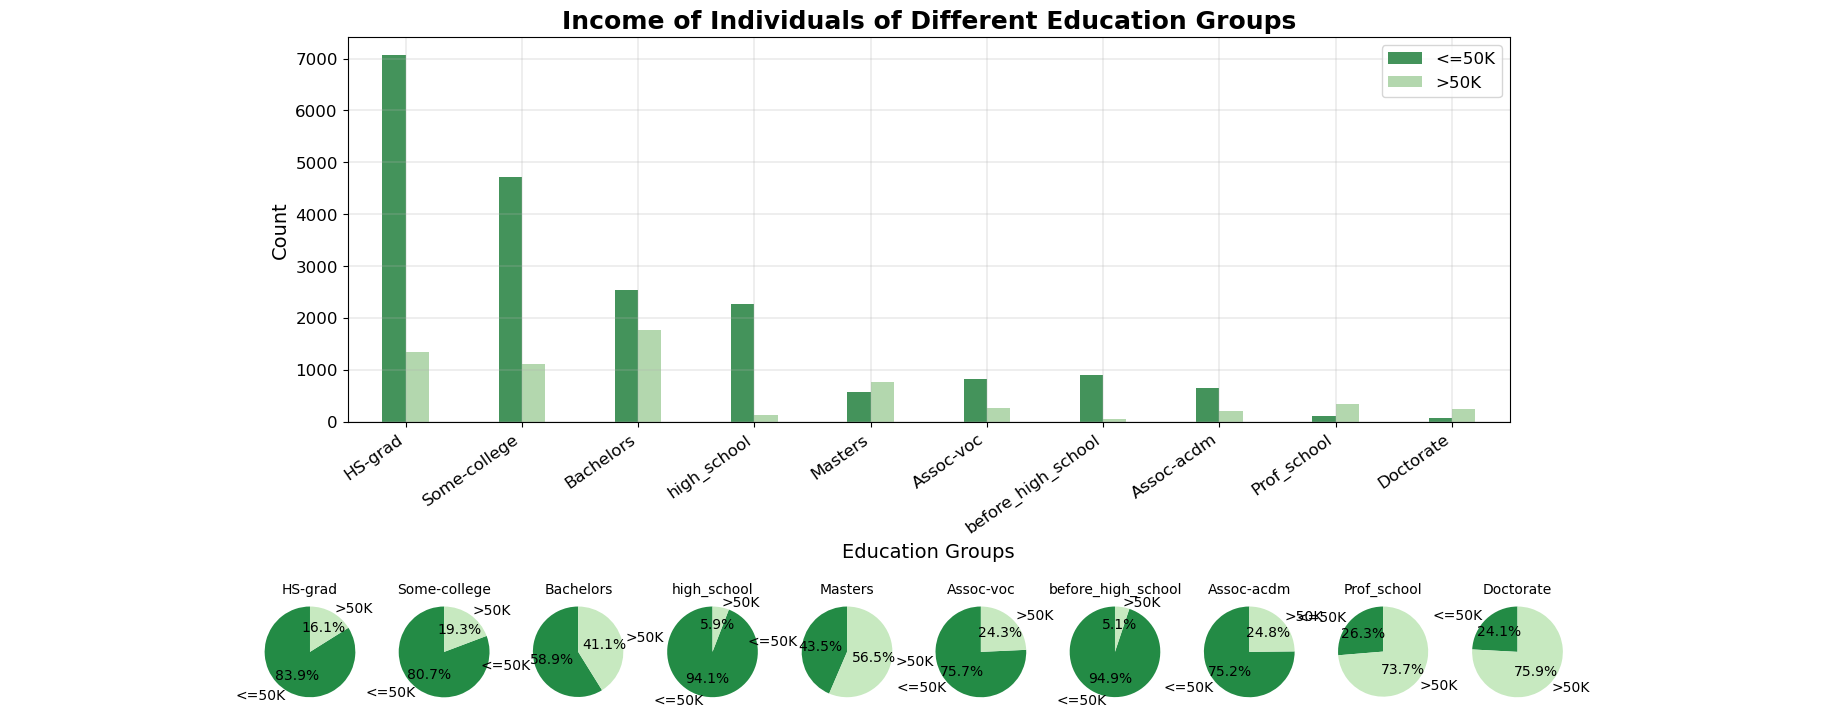

In [36]:
FIG7 =plt.figure(figsize=(15,5))
order_list = ['HS-grad', 'Some-college', 'Bachelors', 'high_school', 'Masters',
       'Assoc-voc', 'before_high_school', 'Assoc-acdm', 'Prof_school',
       'Doctorate']
ax = sns.countplot(data=df, x='education_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Education Groups', fontsize=18, fontweight='bold')
plt.xlabel('Education Groups', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=35, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars

        # Pie chart inset above the bar
        pie_ax = FIG7.add_axes([x_pos / (len(order_list)+1.18) - 0.1, -0.45, 0.4, 0.2])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/education3.png", bbox_inches="tight")
plt.show()

## Marital-Status

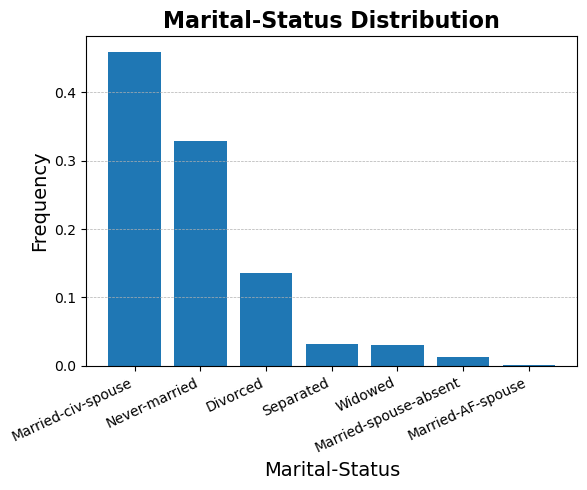

In [37]:
fig5 = plt.figure(figsize = (6,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_marital_status = df["marital-status"].value_counts()
plt.bar(vc_marital_status.index, vc_marital_status.values/df.shape[0])
plt.title("Marital-Status Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Marital-Status", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/marital-status1.png", bbox_inches="tight")

In [38]:
def marital_group(x):
    if x in [ "Never-married", "Separated", "Divorced", "Widowed"]:
        return "Single"
    else: # x in [ "Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]:
        return "Married"

df['marital_group'] = df['marital-status'].apply(marital_group)
df['marital_group'].describe()

count      26049
unique         2
top       Single
freq       13743
Name: marital_group, dtype: object

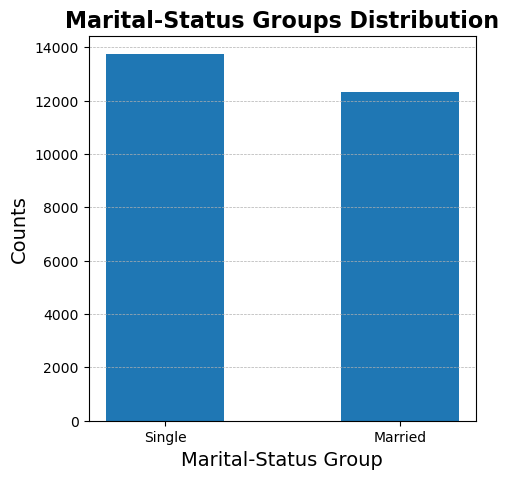

In [39]:
Fig8 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_marital_group = df["marital_group"].value_counts()
plt.bar(vc_marital_group.index, vc_marital_group.values, width = 0.5, align='center')
plt.title("Marital-Status Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Marital-Status Group", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/marital-status2.png", bbox_inches="tight")

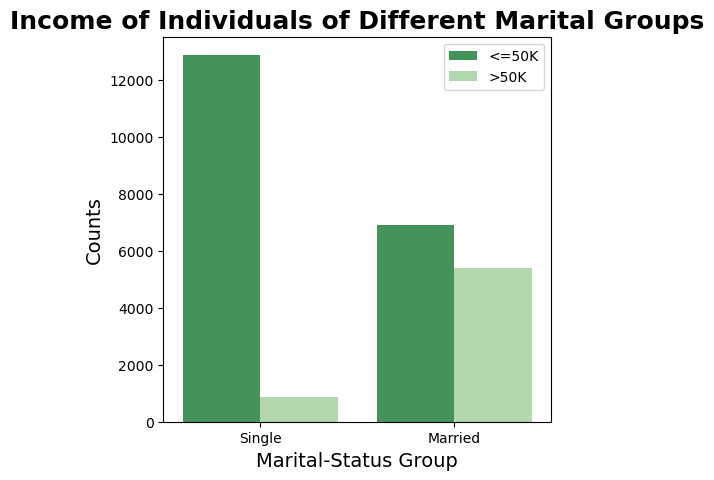

In [40]:
Fig9 =plt.figure(figsize=(5,5))
order_list = ['Single', 'Married']
sns.countplot(data=df, x='marital_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Marital Groups', fontsize=18, fontweight='bold')
plt.xlabel('Marital-Status Group', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

In [41]:
# Grouping data by workclass group and income
grouped = df.groupby(['marital_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
marital_group,,
Married,6907,5399
Single,12869,874


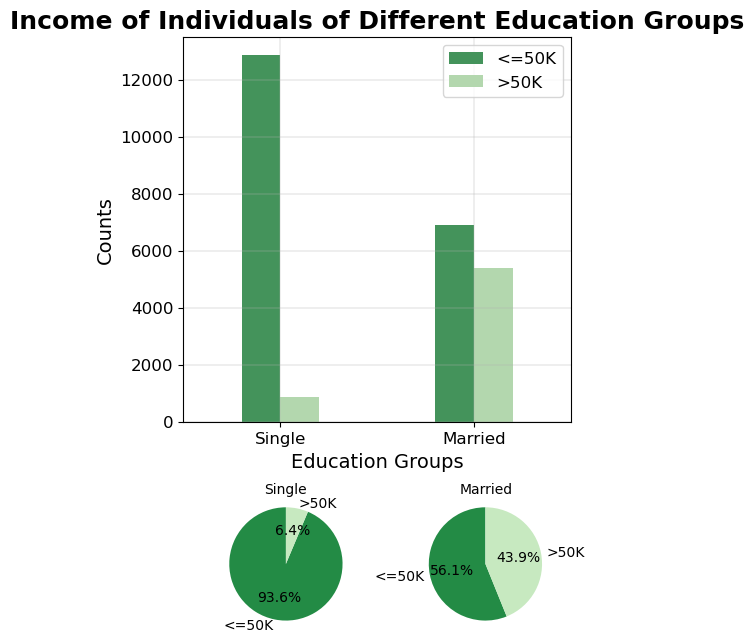

In [42]:
FIG9 =plt.figure(figsize=(5,5))
order_list = ['Single', 'Married']
ax = sns.countplot(data=df, x='marital_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Education Groups', fontsize=18, fontweight='bold')
plt.xlabel('Education Groups', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# plt.xticks(rotation=45, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)


        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars


        # Pie chart inset above the bar
        pie_ax = FIG9.add_axes([x_pos / (len(order_list)+0.5) +0.08, -0.3, 0.5, 0.25])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/marital-status3.png", bbox_inches="tight")
plt.show()

## Occupation

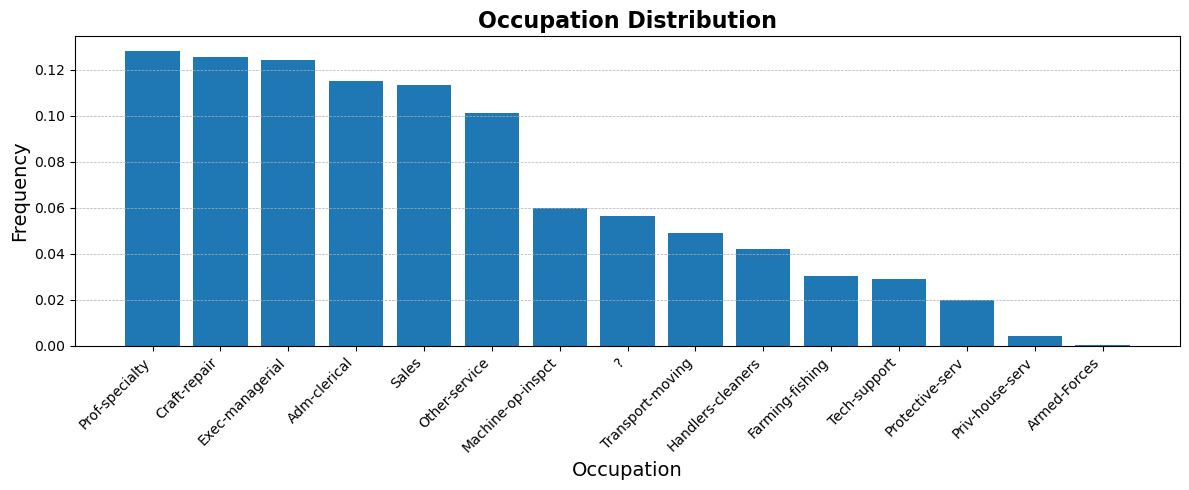

In [43]:
fig6 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_occupation = df["occupation"].value_counts()
plt.bar(vc_occupation.index, vc_occupation.values/df.shape[0])
plt.title("Occupation Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/occupation1.png", bbox_inches="tight")

In [44]:
print(vc_occupation.index)

Index(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces'],
      dtype='object')


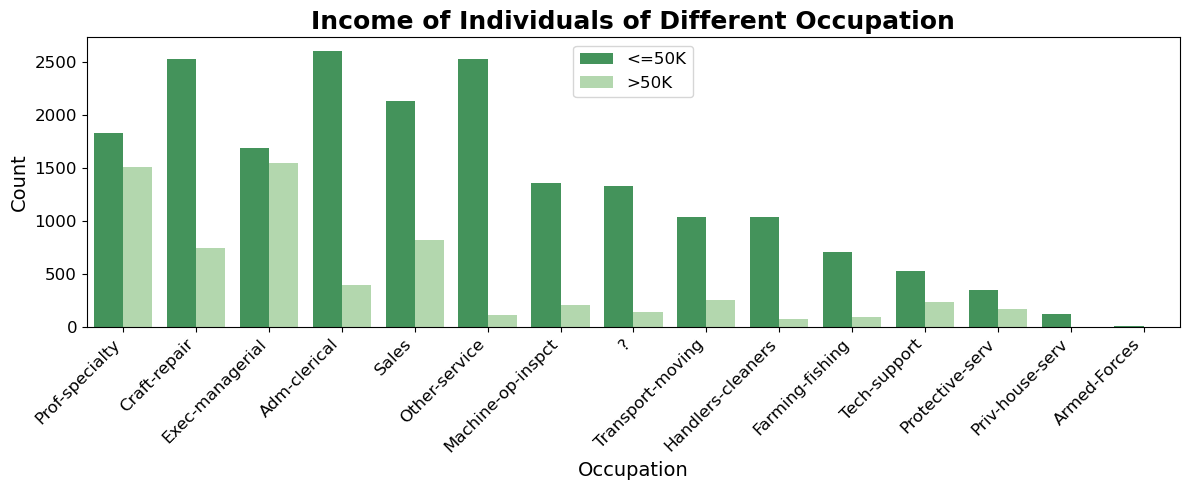

In [45]:
Fig10 =plt.figure(figsize=(12,5))
order_list = ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
sns.countplot(data=df, x='occupation', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Occupation', fontsize=18, fontweight='bold')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [46]:
# Grouping data by workclass group and income
grouped = df.groupby(['occupation', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
occupation,,
?,1333,143
Adm-clerical,2604,396
Armed-Forces,6,1
Craft-repair,2525,744
Exec-managerial,1688,1547
Farming-fishing,708,87
Handlers-cleaners,1034,68
Machine-op-inspct,1357,202
Other-service,2532,110


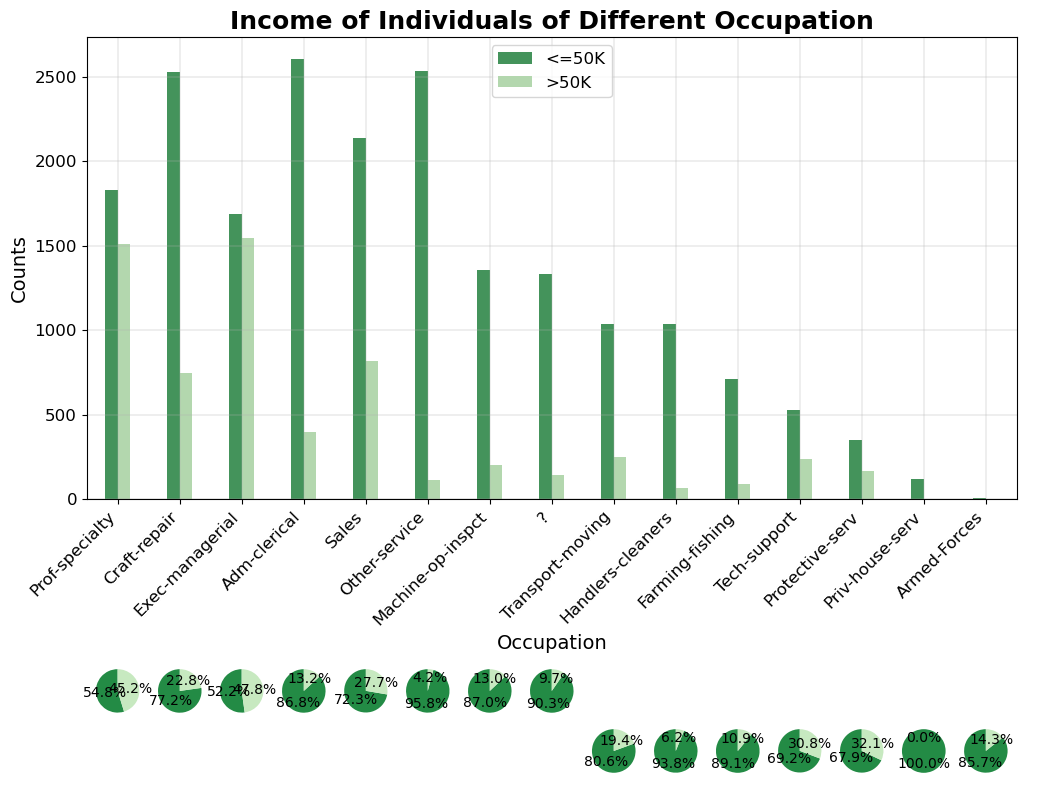

In [47]:
FIG10 =plt.figure(figsize=(12,6))
order_list = ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical',
       'Sales', 'Other-service', 'Machine-op-inspct', '?', 'Transport-moving',
       'Handlers-cleaners', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Priv-house-serv', 'Armed-Forces']
ax = sns.countplot(data=df, x='occupation', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Occupation', fontsize=18, fontweight='bold')
plt.xlabel('Occupation', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')



# Total number of rows for pies below the x-axis
row_count = 2
cols_per_row = int(np.ceil(len(order_list) / row_count))

for i, group in enumerate(order_list):
    ax.patches[i].set_width(w)
    ax.patches[i + len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x() + 0.4 - w)

    if group in grouped.index:
        bar1 = ax.patches[i]
        bar2 = ax.patches[i + len(order_list)]

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values

        # Determine row and column for pie chart layout
        row = 0 if i < cols_per_row else 1
        col = i if row == 0 else i - cols_per_row

        # Center x-position in data coordinates between two bars
        x_data = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2
        # Convert to figure coordinates
        x_fig = (ax.transData.transform((x_data, 0))[0] - FIG10.bbox.x0) / FIG10.bbox.width

        # Y positions in figure coordinates: adjust for spacing between rows
        y_base = -0.25  # Base y position for the lower row
        y_step = -0.1  # Vertical distance between rows
        y_fig = y_base + row * y_step

        # Add pie chart inset
        pie_ax = FIG10.add_axes([x_fig - 0.04, y_fig, 0.08, 0.08])
        pie_ax.pie(pie_sizes, labels=None, autopct='%1.1f%%',
                   colors=['#238b45', '#c7e9c0'], startangle=90)
        #pie_ax.set_title(group, fontsize=8)
        pie_ax.axis('equal')



plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/occupation2.png", bbox_inches="tight")        
plt.show()

## Relationship

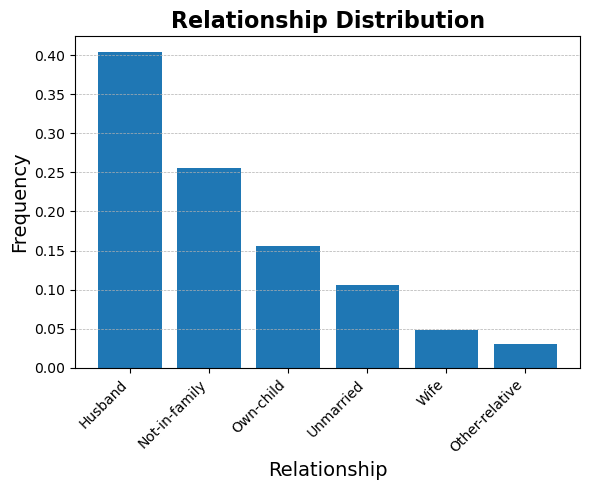

In [48]:
fig7 = plt.figure(figsize = (6,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_relationship = df["relationship"].value_counts()
plt.bar(vc_relationship.index, vc_relationship.values/df.shape[0])
plt.title("Relationship Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Relationship", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/relationship1.png", bbox_inches="tight")

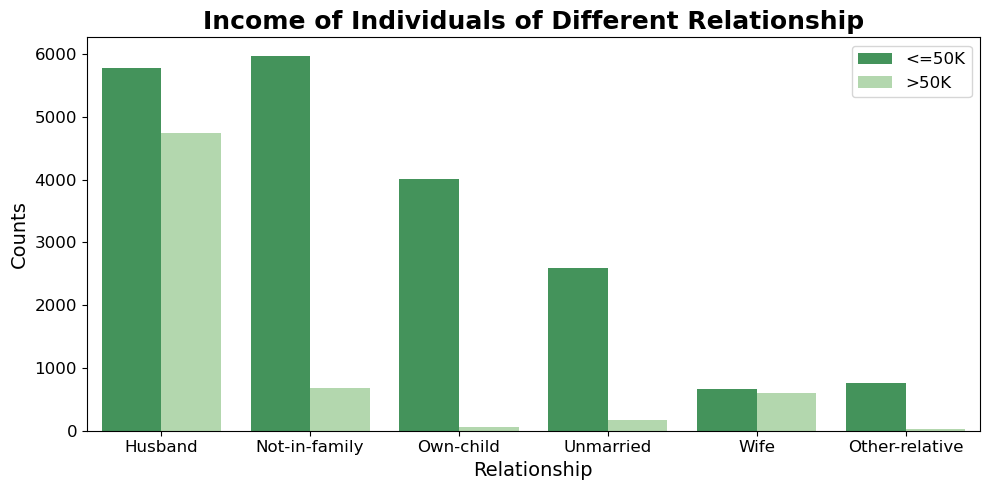

In [49]:
Fig11 =plt.figure(figsize=(10,5))
order_list = vc_relationship.index
sns.countplot(data=df, x='relationship', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xlabel('Relationship', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [50]:
print(vc_relationship.index)

Index(['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative'],
      dtype='object')


In [51]:
# Grouping data by workclass group and income
grouped = df.groupby(['relationship', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
relationship,,
Husband,5773,4743
Not-in-family,5971,673
Other-relative,759,28
Own-child,4014,56
Unmarried,2594,167
Wife,665,606


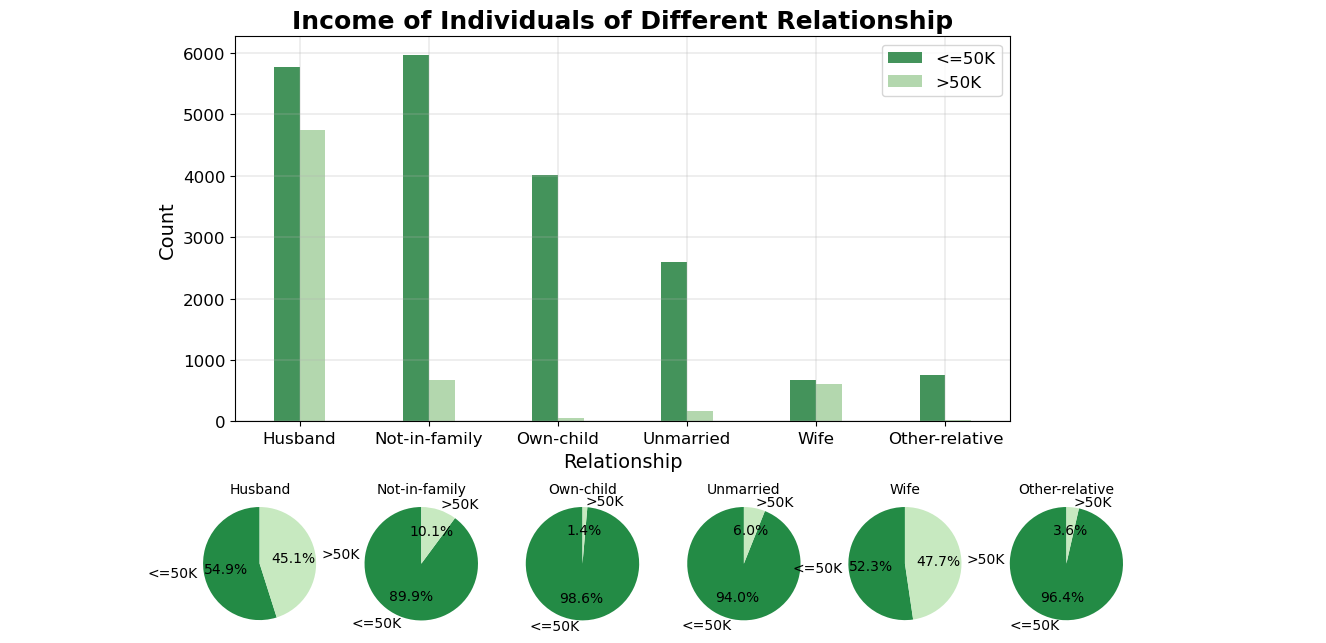

<Figure size 640x480 with 0 Axes>

In [52]:
FIG11 =plt.figure(figsize=(10,5))
order_list = ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative']
ax = sns.countplot(data=df, x='relationship', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xlabel('Relationship', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# plt.xticks(rotation=45, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars

        # Pie chart inset above the bar
        pie_ax = FIG11.add_axes([x_pos / (len(order_list)+0.2) -0.1, -0.3, 0.5, 0.25])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular

plt.show()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/relationship2.png", bbox_inches="tight")

## Race

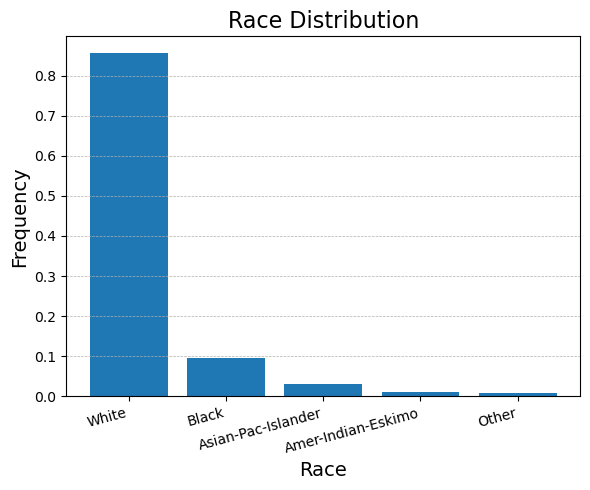

In [53]:
fig8 = plt.figure(figsize = (6,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_race = df["race"].value_counts()
plt.bar(vc_race.index, vc_race.values/df.shape[0])
plt.title("Race Distribution", loc='center', fontsize=16)
plt.xlabel("Race", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/race1.png", bbox_inches="tight")

In [54]:
def race_group(x):
    if x == "White":
        return "White"
    if x == "Black":
        return "Black"
    else: # x in [ "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"]:
        return "Others"

df['race_group'] = df['race'].apply(race_group)
df['race_group'].describe()

count     26049
unique        3
top       White
freq      22281
Name: race_group, dtype: object

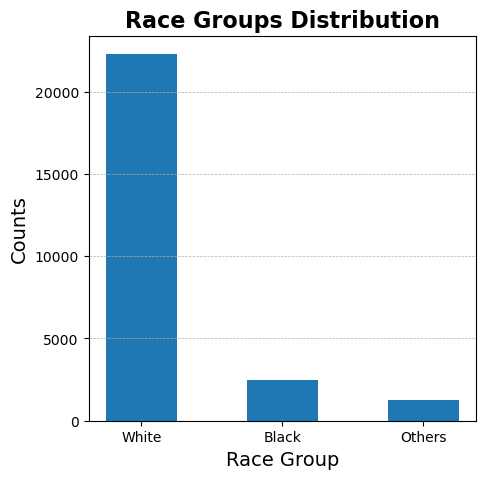

In [55]:
Fig12 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_race_group = df["race_group"].value_counts()
plt.bar(vc_race_group.index, vc_race_group.values, width = 0.5)
plt.title("Race Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Race Group", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/relationship2.png", bbox_inches="tight")

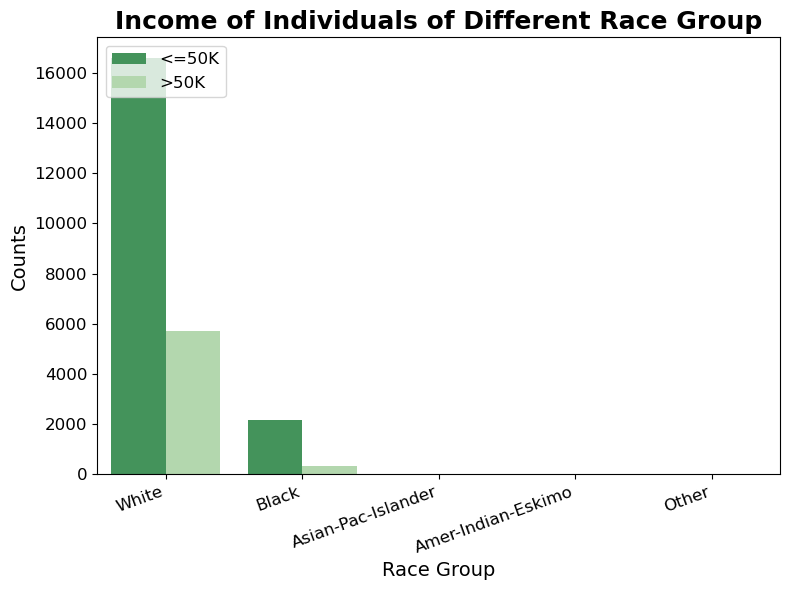

In [56]:
Fig13 =plt.figure(figsize=(8,6))
order_list = vc_race.index
sns.countplot(data=df, x='race_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Race Group', fontsize=18, fontweight='bold')
plt.xlabel('Race Group', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=20, ha='right')
plt.tight_layout()

In [57]:
# Grouping data by workclass group and income
grouped = df.groupby(['race_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
race_group,,
Black,2185,318
Others,1014,251
White,16577,5704


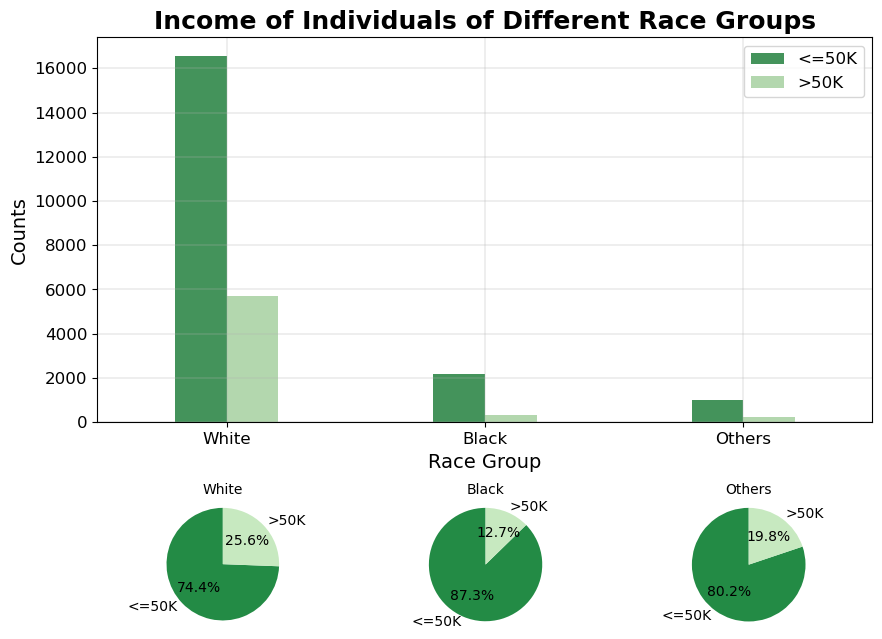

In [58]:
FIG13 =plt.figure(figsize=(10,5))
order_list = ['White', 'Black', 'Others']
ax = sns.countplot(data=df, x='race_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Race Groups', fontsize=18, fontweight='bold')
plt.xlabel('Race Group', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# plt.xticks(rotation=45, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)
        

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars

        # Pie chart inset above the bar
        pie_ax = FIG13.add_axes([x_pos / (len(order_list)+0.8) +0.15, -0.3, 0.2, 0.25])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/race3.png", bbox_inches="tight")
plt.show()

## Sex

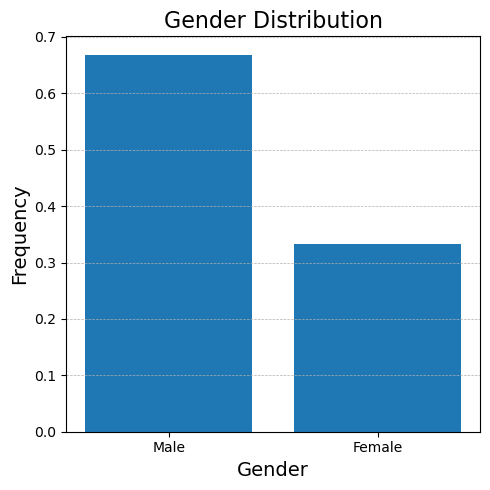

In [59]:
fig9 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_sex = df["sex"].value_counts()
plt.bar(vc_sex.index, vc_sex.values/df.shape[0])
plt.title("Gender Distribution", loc='center', fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/sex1.png", bbox_inches="tight")

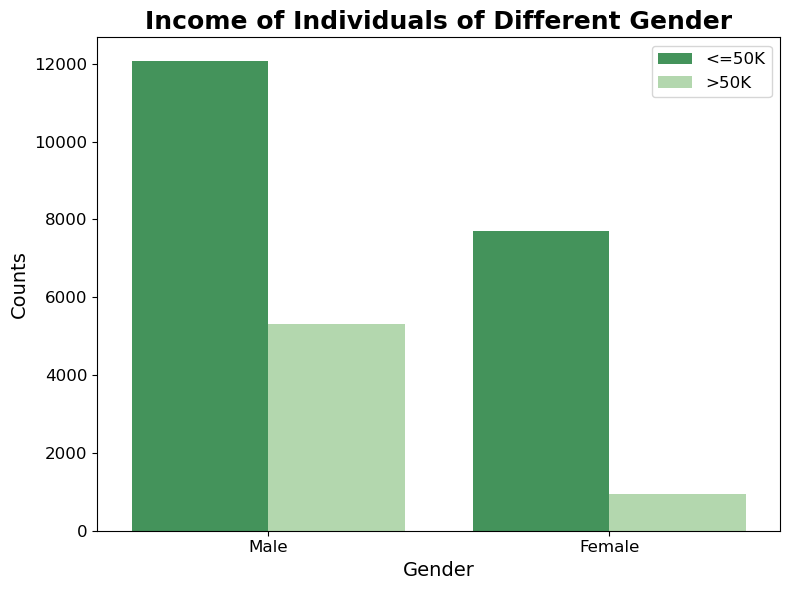

In [60]:
Fig14 =plt.figure(figsize=(8,6))
order_list = vc_sex.index
sns.countplot(data=df, x='sex', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [61]:
# Grouping data by workclass group and income
grouped = df.groupby(['sex', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
sex,,
Female,7702,954
Male,12074,5319


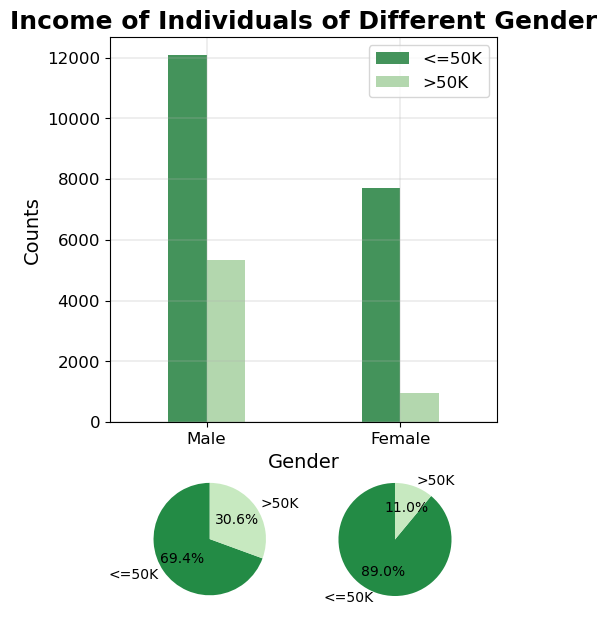

In [62]:
FIG14 =plt.figure(figsize=(5,5))
order_list = ['Male', 'Female']
ax = sns.countplot(data=df, x='sex', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# plt.xticks(rotation=45, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)
        

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars


        # Pie chart inset above the bar
        pie_ax = FIG14.add_axes([x_pos / (len(order_list)+0.7) +0.2, -0.3, 0.25, 0.35])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        # pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/sex2.png", bbox_inches="tight")
plt.show()

## Capital-gain

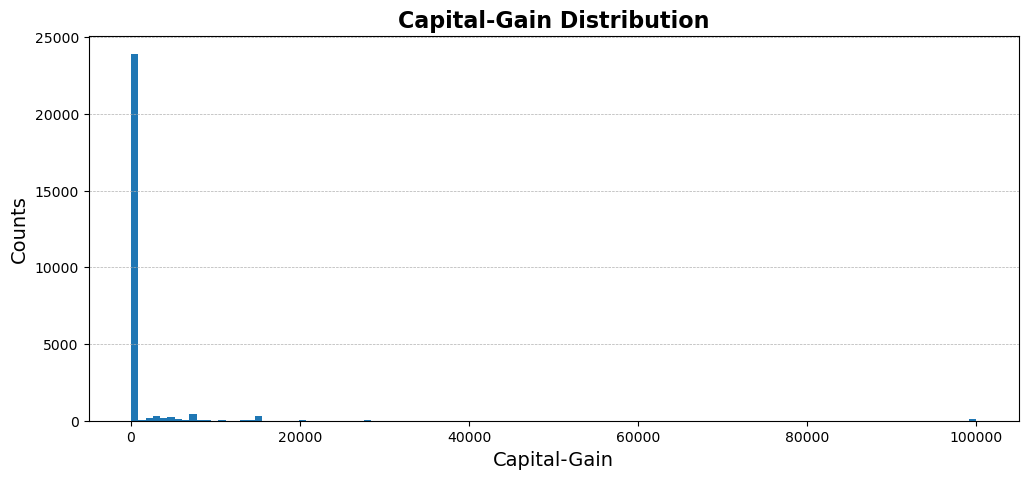

In [63]:
df1 = df[df["capital-gain"]>0]["capital-gain"]

fig10 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(df["capital-gain"], bins=116, rwidth=5)
plt.title("Capital-Gain Distribution", loc='center', fontsize=16, fontweight = 'bold')
plt.xlabel("Capital-Gain", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/capital-gain1.png", bbox_inches="tight")

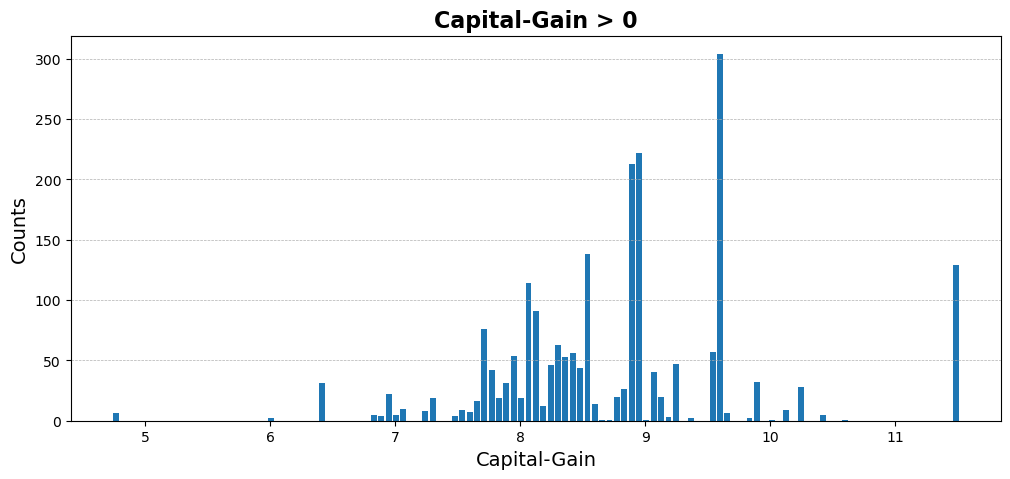

In [64]:
Fig15 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(np.log(df1), bins=115, rwidth=0.8)
plt.title("Capital-Gain > 0", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Capital-Gain", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/capital-gain2.png", bbox_inches="tight")

## Capital-Loss

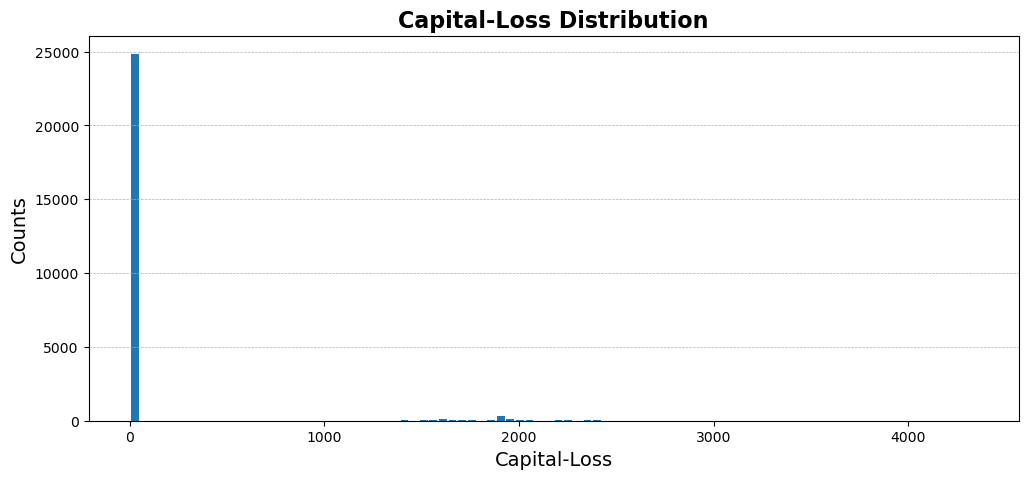

In [65]:
df2 = df[df["capital-loss"]>0]["capital-loss"]

fig11 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(df["capital-loss"], bins=88, rwidth=0.8)
plt.title("Capital-Loss Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Capital-Loss", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/capital-loss1.png", bbox_inches="tight")

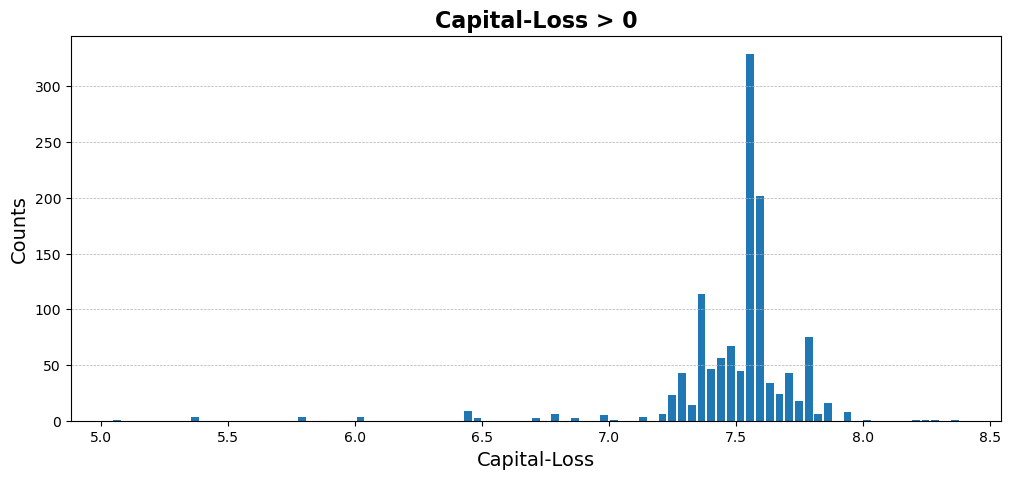

In [66]:
Fig16 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(np.log(df2), bins=87, rwidth=0.8)
plt.title("Capital-Loss > 0", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Capital-Loss", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/capital-loss2.png", bbox_inches="tight")

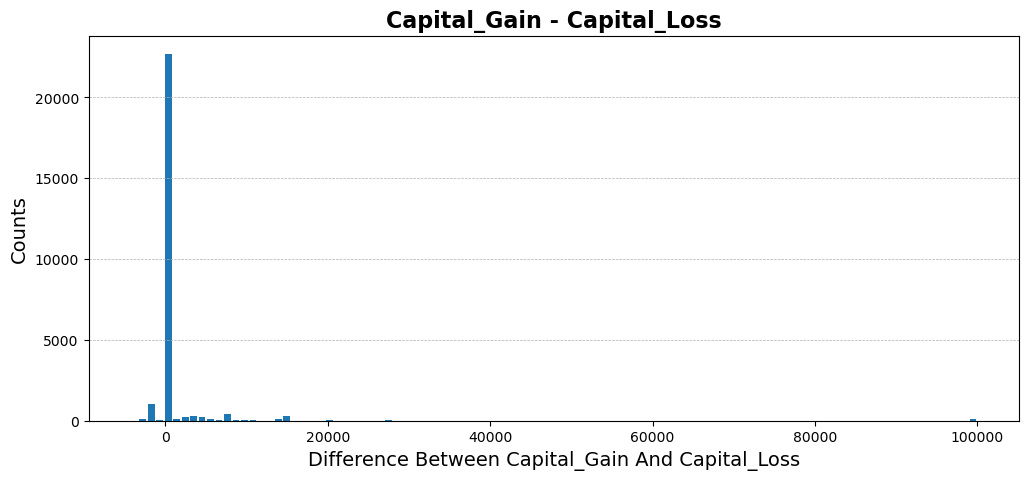

In [67]:
Fig17 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(df["capital-gain"]-df["capital-loss"], bins=100, rwidth=0.8)
plt.title("Capital_Gain - Capital_Loss", loc='center', fontsize=16, fontweight = 'bold')
plt.xlabel("Difference Between Capital_Gain And Capital_Loss", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/diff_capital1.png", bbox_inches="tight")

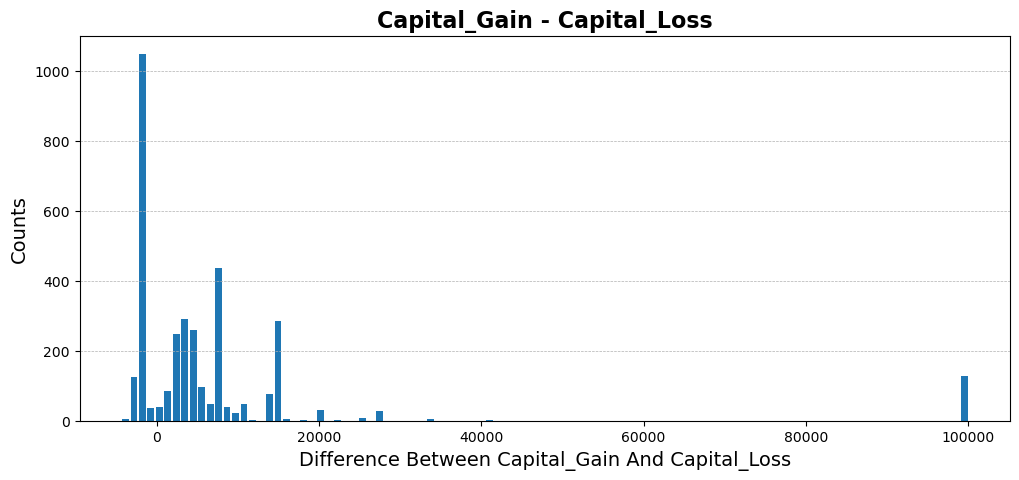

In [68]:
df3 = df[df["capital-gain"]-df["capital-loss"] != 0]

Fig18 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist((df3["capital-gain"]-df3["capital-loss"]), bins=100, rwidth=0.8)
plt.title("Capital_Gain - Capital_Loss", loc='center', fontsize=16, fontweight = 'bold')
plt.xlabel("Difference Between Capital_Gain And Capital_Loss", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/diff_capital2.png", bbox_inches="tight")

## Hours-per-Week

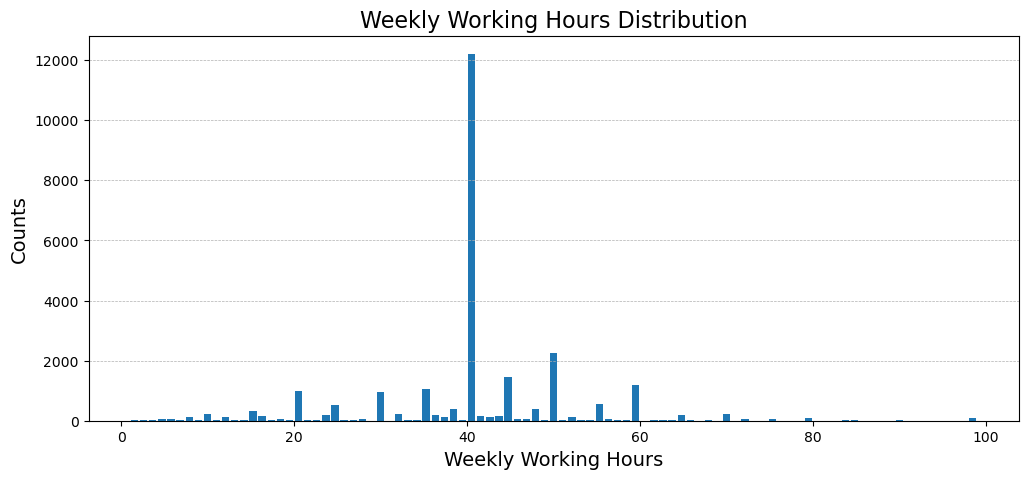

In [69]:
fig12 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.hist(df["hours-per-week"], bins=93, rwidth=0.8)
plt.title("Weekly Working Hours Distribution", loc='center', fontsize=16)
plt.xlabel("Weekly Working Hours", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/hours-per-week1.png", bbox_inches="tight")

In [70]:
def weekly_working_hours_group(x):
    if( 0 < x < 21 ):
        return "0-20 hrs"
    if( 20 < x < 41 ):
        return "21-40 hrs"
    if( 40 < x < 61 ):
        return "41-60 hrs"
    if( 60 < x < 81 ):
        return "61-80 hrs"
    else:
        return "Greater than 80 hrs"

df['weekly_working_hours_group'] = df['hours-per-week'].apply(weekly_working_hours_group)
df['weekly_working_hours_group'].describe()

count         26049
unique            5
top       21-40 hrs
freq          16071
Name: weekly_working_hours_group, dtype: object

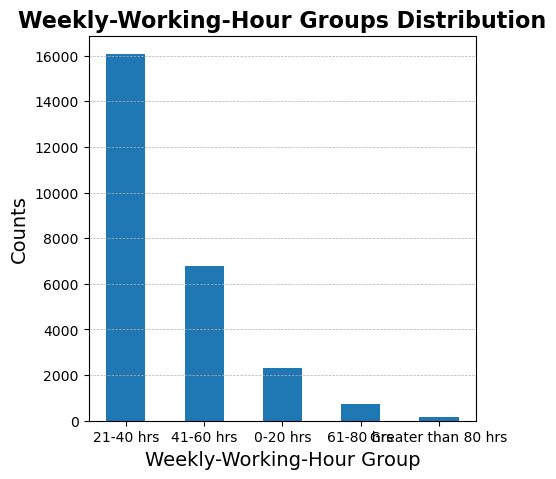

In [71]:
Fig19 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_weekly_working_hrs = df["weekly_working_hours_group"].value_counts()
plt.bar(vc_weekly_working_hrs.index, vc_weekly_working_hrs.values, width = 0.5)
plt.title("Weekly-Working-Hour Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Weekly-Working-Hour Group", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/hours-per-week2.png", bbox_inches="tight")

In [72]:
print(vc_weekly_working_hrs.index)

Index(['21-40 hrs', '41-60 hrs', '0-20 hrs', '61-80 hrs',
       'Greater than 80 hrs'],
      dtype='object')


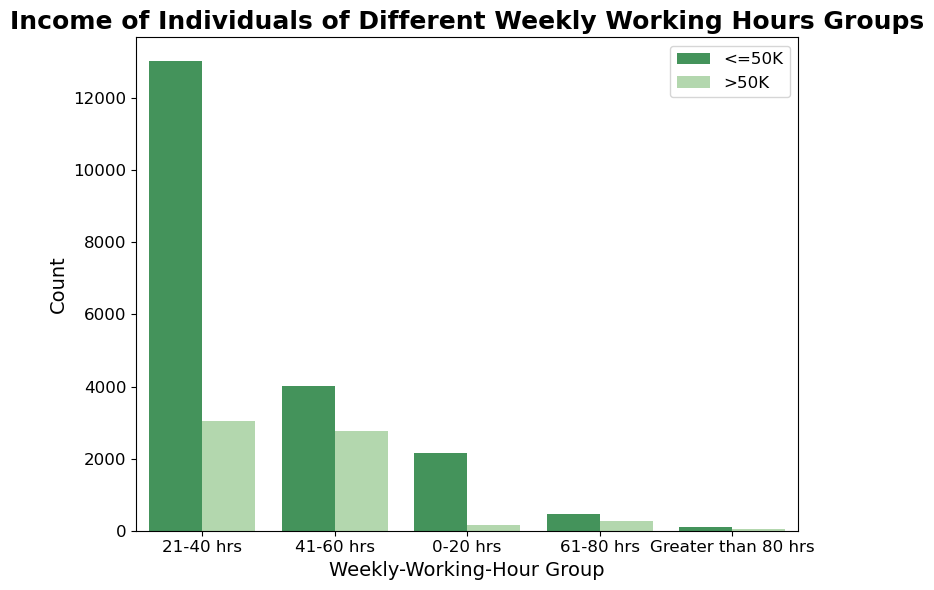

In [73]:
Fig20 =plt.figure(figsize=(8,6))
order_list = vc_weekly_working_hrs.index
sns.countplot(data=df, x='weekly_working_hours_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Weekly Working Hours Groups', fontsize=18, fontweight='bold')
plt.xlabel('Weekly-Working-Hour Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [74]:
# Grouping data by Weekly-working-hour group and income
grouped = df.groupby(['weekly_working_hours_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
weekly_working_hours_group,,
0-20 hrs,2165,160
21-40 hrs,13039,3032
41-60 hrs,4004,2756
61-80 hrs,451,275
Greater than 80 hrs,117,50


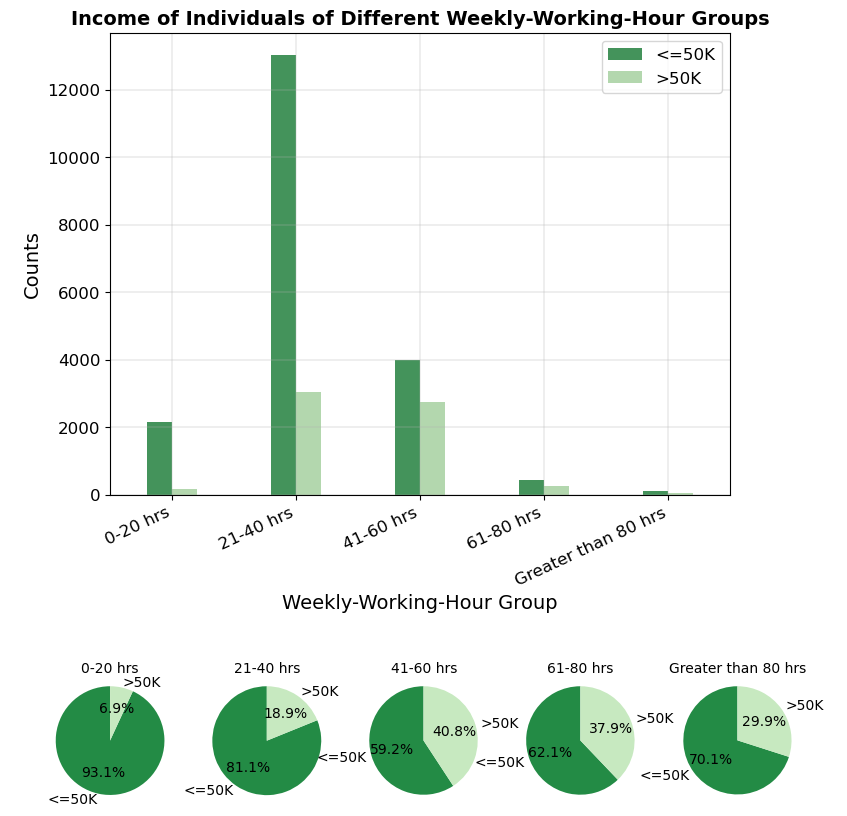

In [75]:
FIG20 =plt.figure(figsize=(8,6))
order_list = ['0-20 hrs', '21-40 hrs', '41-60 hrs', '61-80 hrs',
       'Greater than 80 hrs']
ax = sns.countplot(data=df, x='weekly_working_hours_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Weekly-Working-Hour Groups', fontsize=14, fontweight='bold')
plt.xlabel('Weekly-Working-Hour Group', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.xticks(rotation=25, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)
        

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars

        # Pie chart inset above the bar
        pie_ax = FIG20.add_axes([x_pos / (len(order_list)+0.1) +0.0, -0.4, 0.25, 0.2])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/hours-per-week3.png", bbox_inches="tight")
plt.show()


## Native-country

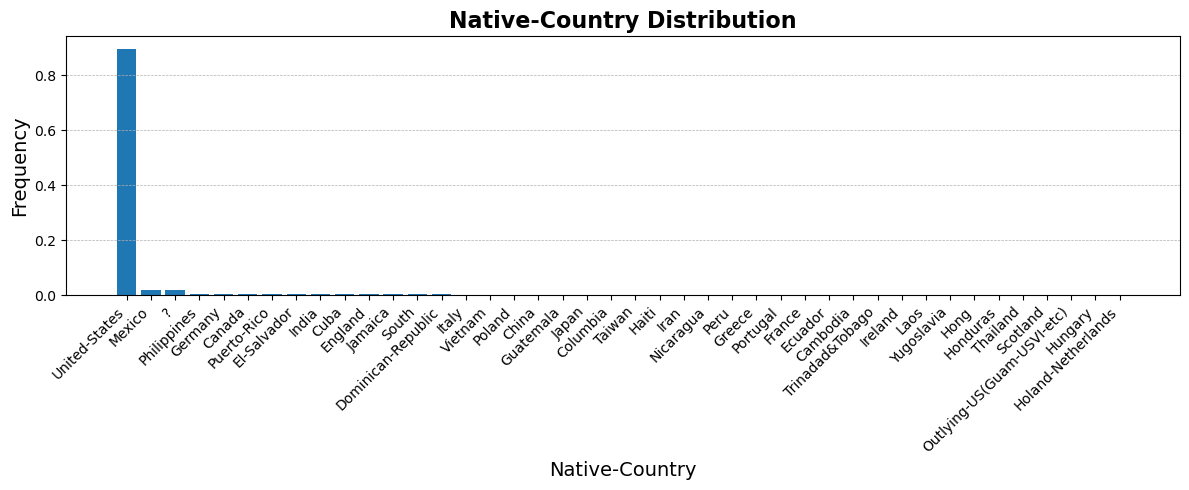

In [76]:
fig13 = plt.figure(figsize = (12,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc = df["native-country"].value_counts()
plt.bar(vc.index, vc.values/df.shape[0])
plt.title("Native-Country Distribution", loc='center', fontsize=16, fontweight = 'bold')
plt.xlabel("Native-Country", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/native-country1.png", bbox_inches="tight")

In [77]:
def native_country_group(x):
    if( x == "United-States" ):
        return "United-States"
    else:
        return "Others"

df['native_country_group'] = df['native-country'].apply(native_country_group)
df['native_country_group'].describe()

count             26049
unique                2
top       United-States
freq              23366
Name: native_country_group, dtype: object

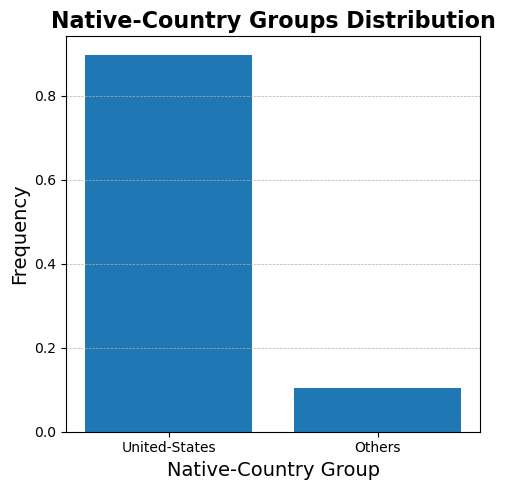

In [78]:
Fig21 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc_native_country = df["native_country_group"].value_counts()
plt.bar(vc_native_country.index, vc_native_country.values/df.shape[0])
plt.title("Native-Country Groups Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Native-Country Group", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/native-country2.png", bbox_inches="tight")

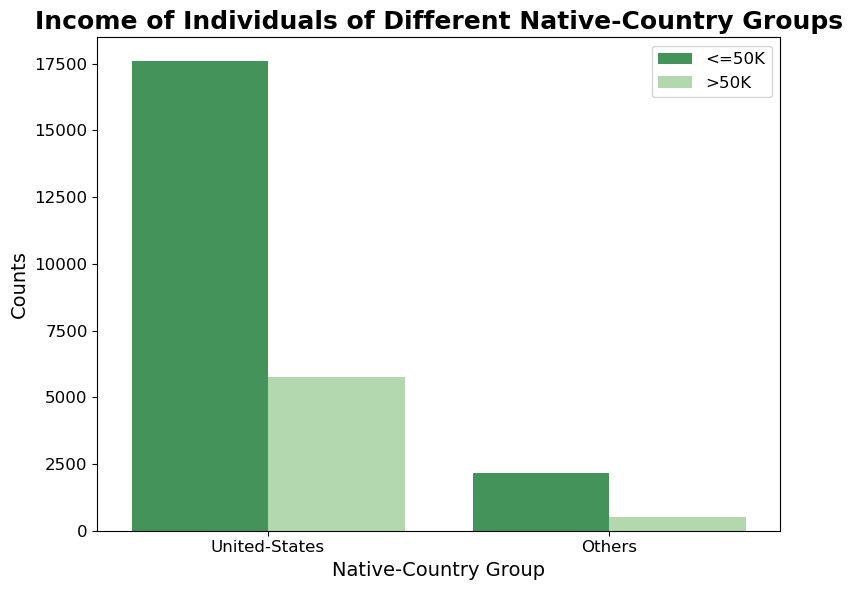

In [79]:
Fig22 =plt.figure(figsize=(8,6))
order_list = vc_native_country.index
sns.countplot(data=df, x='native_country_group', hue='income', palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Native-Country Groups', fontsize=18, fontweight='bold')
plt.xlabel('Native-Country Group', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [80]:
# Grouping data by Weekly-working-hour group and income
grouped = df.groupby(['native_country_group', 'income']).size().unstack(fill_value=0)
grouped

income,<=50K,>50K
native_country_group,,
Others,2166,517
United-States,17610,5756


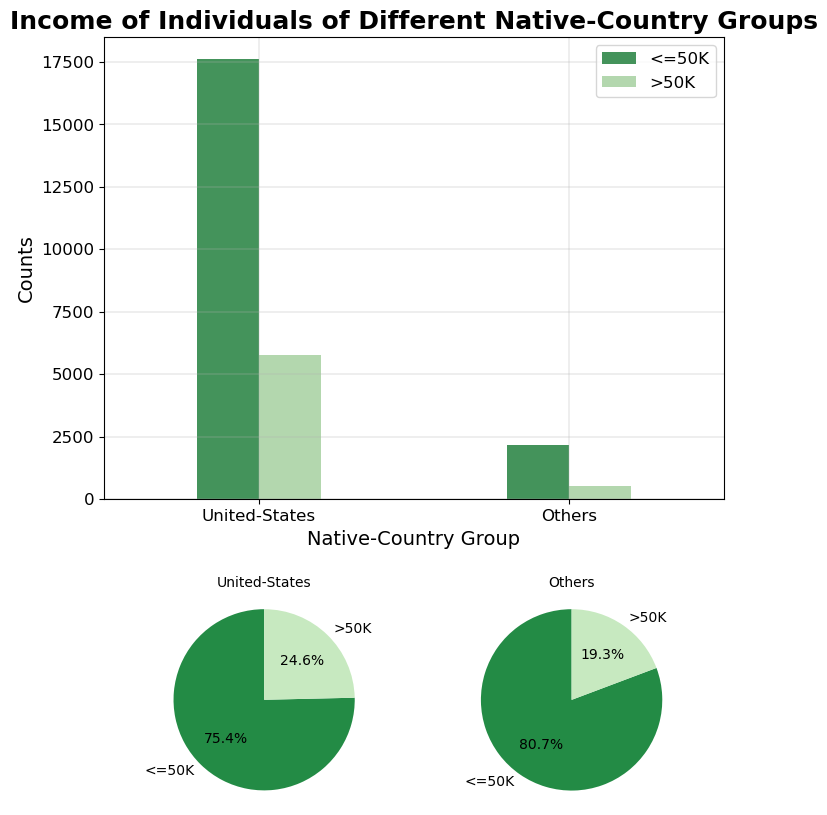

In [81]:
FIG22 =plt.figure(figsize=(8,6))
order_list = ['United-States', 'Others']
ax = sns.countplot(data=df, x='native_country_group', hue='income', palette='Greens_r', order=order_list)
plt.grid(linewidth=0.3)

plt.title('Income of Individuals of Different Native-Country Groups', fontsize=18, fontweight='bold')
plt.xlabel('Native-Country Group', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
#plt.xticks(rotation=35, ha='right')

w = 0.2
# Adding pie charts above each bar
for i, group in enumerate(order_list):
    
    ax.patches[i].set_width(w)
    ax.patches[i+len(order_list)].set_width(w)
    ax.patches[i].set_x(ax.patches[i].get_x()+0.4-w)
    if group in grouped.index:
        # Get the two bars corresponding to the current group (each group has two bars: <=50K and >50K)
        bar1 = ax.patches[i]      # First bar (<=50K)
        bar2 = ax.patches[i + len(order_list)]  # Second bar (>50K)

        # Pie chart data
        counts = grouped.loc[group]
        pie_sizes = counts.values
        
        # Adjust x and y positions dynamically
        x_pos = (bar1.get_x() + bar2.get_x()) / 2 + bar1.get_width() / 2  # Center between the two bars


        # Pie chart inset above the bar
        pie_ax = FIG22.add_axes([x_pos / (len(order_list)+0.6) +0.2, -0.4, 0.25, 0.35])  # Adjust position and size
        pie_ax.pie(pie_sizes, labels=counts.index, autopct='%1.1f%%', colors=['#238b45', '#c7e9c0'], startangle = 90)
        pie_ax.set_title(group, fontsize=10)
        pie_ax.axis('equal')  # Keep the pie chart circular
plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/native-country3.png", bbox_inches="tight")
plt.show()


## Income

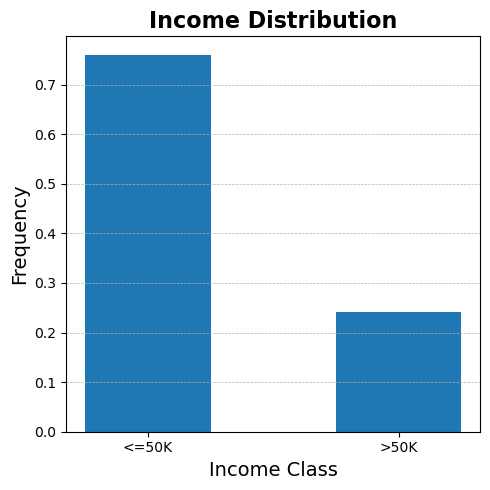

In [82]:
fig14 = plt.figure(figsize = (5,5))
plt.grid(axis='y', linestyle='--', linewidth=0.5)
vc = df["income"].value_counts()
plt.bar(vc.index, vc.values/df.shape[0], width = 0.5)
plt.title("Income Distribution", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("Income Class", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/income1.png", bbox_inches="tight")

In [83]:
df['income_class']=df['income'].map({'<=50K': 0, '>50K': 1})

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         26049 non-null  int64 
 1   workclass                   26049 non-null  object
 2   fnlwgt                      26049 non-null  int64 
 3   education                   26049 non-null  object
 4   education-num               26049 non-null  int64 
 5   marital-status              26049 non-null  object
 6   occupation                  26049 non-null  object
 7   relationship                26049 non-null  object
 8   race                        26049 non-null  object
 9   sex                         26049 non-null  object
 10  capital-gain                26049 non-null  int64 
 11  capital-loss                26049 non-null  int64 
 12  hours-per-week              26049 non-null  int64 
 13  native-country              26049 non-null  ob

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


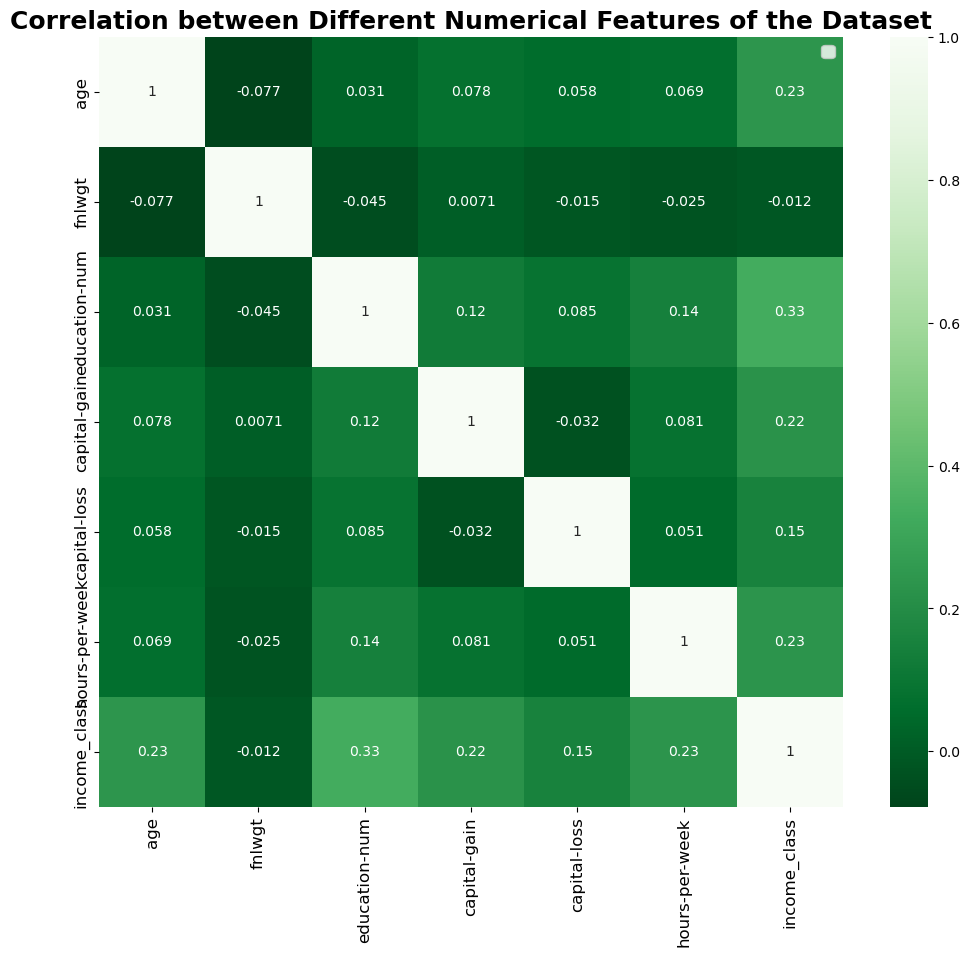

In [85]:
plt.figure(figsize = (12,10))
plt.title("Correlation between Different Numerical Features of the Dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

plt.savefig("/Users/xin/Downloads/AMS 580 Project/figures/income2.png", bbox_inches="tight")